In [7]:
import pandas as pd
df= pd.read_csv(r"C:\Users\niyon\Downloads\archive\uber.csv")
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [8]:
print(df.isnull().sum())  


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [9]:
df= df.drop_duplicates()
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [10]:
mean=df['fare_amount'].mean()
print("Mean:", mean)

Mean: 11.359955250000002


In [11]:
median=df['fare_amount'].median()
print("Median:", median)

Median: 8.5


In [13]:
mean=df['fare_amount'].mode()
print("Mode:", mean[0])

Mode: 6.5


In [14]:
std = df['fare_amount'].std()
print("Standard Deviation:", std)

Standard Deviation: 9.901776225068813


In [15]:
Q1 = df['fare_amount'].quantile(0.25)
Q2 = df['fare_amount'].quantile(0.50)  # Median
Q3 = df['fare_amount'].quantile(0.75)

print("Q1 (25%):", Q1)
print("Q2 (Median):", Q2)
print("Q3 (75%):", Q3)


Q1 (25%): 6.0
Q2 (Median): 8.5
Q3 (75%): 12.5


In [16]:
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)



Interquartile Range (IQR): 6.5


In [17]:
data_range = df['fare_amount'].max() - df['fare_amount'].min()
print("Data Range:", data_range)


Data Range: 551.0


In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print("Number of outliers:", len(outliers))
print(outliers.head())


Number of outliers: 17167
    Unnamed: 0                            key  fare_amount  \
6     48725865    2014-10-12 07:04:00.0000002         24.5   
30    31945670   2011-05-21 09:00:00.00000031         25.7   
34    19277743  2014-06-04 06:49:00.000000102         39.5   
39    38703737  2014-02-13 17:57:00.000000102         29.0   
48    22405517    2013-01-03 22:24:41.0000002         56.8   

            pickup_datetime  pickup_longitude  pickup_latitude  \
6   2014-10-12 07:04:00 UTC        -73.961447        40.693965   
30  2011-05-21 09:00:00 UTC        -73.944815        40.834367   
34  2014-06-04 06:49:00 UTC        -73.788080        40.642187   
39  2014-02-13 17:57:00 UTC        -73.992600        40.753172   
48  2013-01-03 22:24:41 UTC        -73.993498        40.764686   

    dropoff_longitude  dropoff_latitude  passenger_count  
6          -73.871195         40.774297                5  
30         -73.989332         40.721920                4  
34         -73.865042      

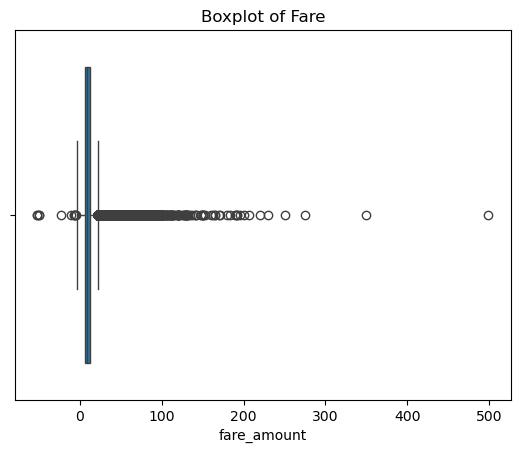

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare")
plt.show()



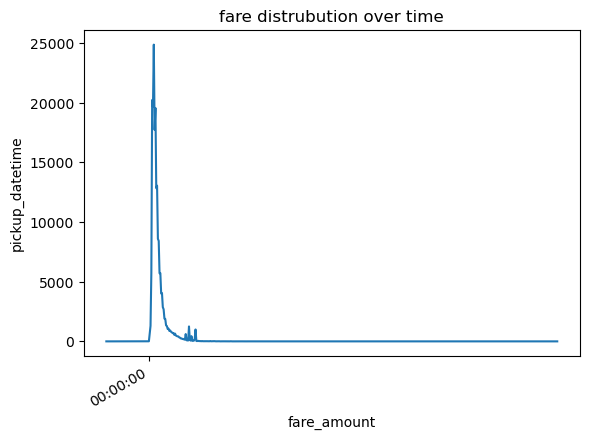

In [ ]:
df['fare_amount'] = pd.to_datetime(df['fare_amount'])  
df['fare_amount'].value_counts().sort_index().plot(kind='line')
plt.title('fare distrubution over time')
plt.xlabel('fare_amount')
plt.ylabel('pickup_datetime')
plt.show()


In [25]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    R = 6371  # Earth radius in km
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [26]:
df['distance_km'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)


In [27]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour  # Hour of the day (0–23)


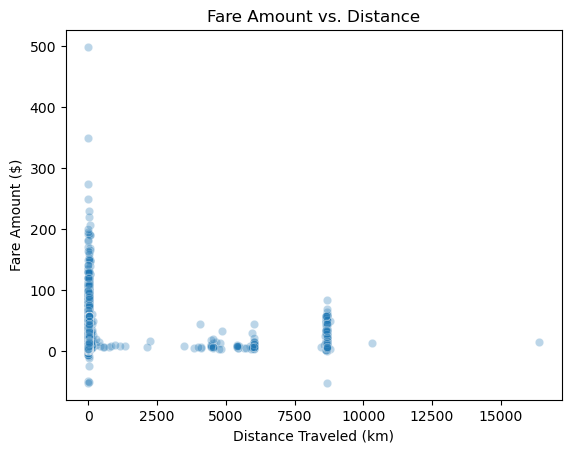

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.3)
plt.title('Fare Amount vs. Distance')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Fare Amount ($)')
plt.show()


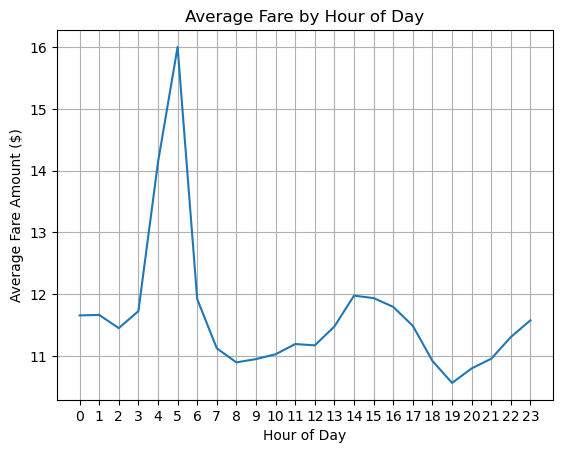

In [29]:
avg_fare_by_hour = df.groupby('hour')['fare_amount'].mean()

plt.plot(avg_fare_by_hour.index, avg_fare_by_hour.values)
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
print(df[['fare_amount', 'distance_km', 'passenger_count']].corr())


                 fare_amount  distance_km  passenger_count
fare_amount         1.000000     0.024684         0.010150
distance_km         0.024684     1.000000        -0.001472
passenger_count     0.010150    -0.001472         1.000000


In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
print(df[['pickup_datetime', 'hour', 'day', 'month', 'day_of_week']].head())

            pickup_datetime  hour  day  month day_of_week
0 2015-05-07 19:52:06+00:00    19    7      5    Thursday
1 2009-07-17 20:04:56+00:00    20   17      7      Friday
2 2009-08-24 21:45:00+00:00    21   24      8      Monday
3 2009-06-26 08:22:21+00:00     8   26      6      Friday
4 2014-08-28 17:47:00+00:00    17   28      8    Thursday


In [32]:
def peak_status(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return "Peak"
    else:
        return "Off-Peak"
df['peak_status'] = df['hour'].apply(peak_status)
print(df[['hour', 'peak_status']].head(10))

   hour peak_status
0    19        Peak
1    20    Off-Peak
2    21    Off-Peak
3     8        Peak
4    17        Peak
5     2    Off-Peak
6     7        Peak
7    13    Off-Peak
8     9        Peak
9    19        Peak


In [33]:
df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

In [34]:
df.to_csv('uber_enhanced.csv', index=False)
print(" File 'uber_enhanced.csv' saved successfully.")

 File 'uber_enhanced.csv' saved successfully.
